# Multi-Class Imbalanced Classification
Imbalanced classification are those prediction tasks where the distribution of examples across class labels is not equal.

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.


In this tutorial, we will focus on the standard imbalanced multi-class classification problem referred to as “Glass Identification” or simply “glass.”

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987.

Ignoring the sample identification number, there are nine input variables that summarize the properties of the glass dataset; they are:

- RI: Refractive Index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

The chemical compositions are measured as the weight percent in corresponding oxide.

There are seven types of glass listed; they are:

- Class 1: building windows (float processed)
- Class 2: building windows (non-float processed)
- Class 3: vehicle windows (float processed)
- Class 4: vehicle windows (non-float processed)
- Class 5: containers
- Class 6: tableware
- Class 7: headlamps

There are 214 observations in the dataset and the number of observations in each class is imbalanced. Note that there are no examples for class 4 (non-float processed vehicle windows) in the dataset.

- Class 1: 70 examples
- Class 2: 76 examples
- Class 3: 17 examples
- Class 4: 0 examples
- Class 5: 13 examples
- Class 6: 9 examples
- Class 7: 29 examples

Although there are minority classes, all classes are equally important in this prediction problem.

The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). There are 163 examples of window glass and 51 examples of non-window glass.

- Window Glass: 163 examples
- Non-Window Glass: 51 examples

Another division of the observations would be between float processed glass and non-float processed glass, in the case of window glass only. This division is more balanced.

- Float Glass: 87 examples
- Non-Float Glass: 76 examples

https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.names

## SMOTE Oversampling for Multi-Class Classification



One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.


https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [2]:
# load and summarize the dataset
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# load the csv file as a data frame
df = pd.read_csv('glass.csv', header=None)
data = df.values
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Class=0, n=70 (32.710%)
Class=1, n=76 (35.514%)
Class=2, n=17 (7.944%)
Class=3, n=13 (6.075%)
Class=4, n=9 (4.206%)
Class=5, n=29 (13.551%)


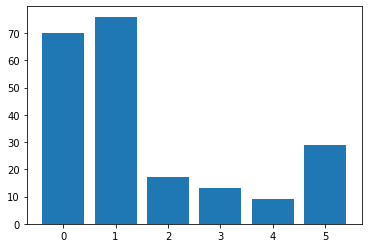

In [3]:
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=0, n=100 (10.000%)
Class=1, n=100 (10.000%)
Class=2, n=200 (20.000%)
Class=3, n=200 (20.000%)
Class=4, n=200 (20.000%)
Class=5, n=200 (20.000%)


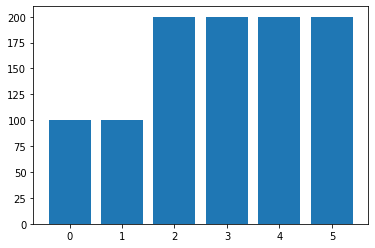

In [5]:
# example of oversampling a multi-class classification dataset with a custom strategy
from imblearn.over_sampling import SMOTE
# transform the dataset
# oversample = SMOTE() # default to oversample to the largest class 76 in this case
strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## Cost-Sensitive Learning for Multi-Class Classification
https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

Most machine learning algorithms assume that all classes have an equal number of examples.

This is not the case in multi-class imbalanced classification. Algorithms can be modified to change the way learning is performed to bias towards those classes that have fewer examples in the training dataset. This is generally called cost-sensitive learning.

The RandomForestClassifier class in scikit-learn supports cost-sensitive learning via the “class_weight” argument.

By default, the random forest class assigns equal weight to each class.

We can evaluate the classification accuracy of the default random forest class weighting on the glass imbalanced multi-class classification dataset.

In [6]:
# Random Forest baseline model and test harness for the glass identification dataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
 
# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = pd.read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# load the dataset
X, y = load_dataset('glass.csv')
# define the reference model
model = RandomForestClassifier(n_estimators=1000)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.796 (0.054)


In [8]:
# cost sensitive random forest with default class weights
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
 
# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = pd.read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# load the dataset
X, y = load_dataset('glass.csv')
# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.797 (0.051)


In [11]:
# cost sensitive random forest with custom class weightings
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
 
# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = pd.read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# load the dataset
X, y = load_dataset('glass.csv')
# define the model
weights = {0:1.0, 1:1.0, 2:2.0, 3:2.0, 4:2.0, 5:2.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.807 (0.062)
